# Object Segmentation (tách vật thể trong ảnh)
## Đặt vấn đề
Giả sử chúng ta có bức ảnh dưới đây và muốn thuật toán tự động nhận ra vùng khuôn mặt và tách nó ra.
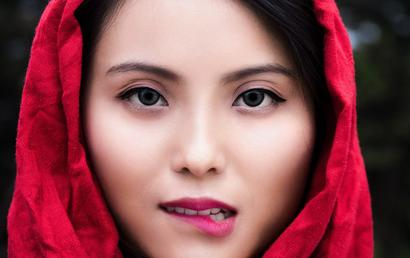

## Lên ý tưởng
Bức ảnh có ba màu chủ đạo: hồng ở khăn và môi; đen ở mắt, tóc, và hậu cảnh; màu da ở vùng còn lại của khuôn mặt. Vậy chúng ta có thể áp dụng thuật toán K-means clustering để phân các pixel ảnh thành 3 clusters, sau đó chọn cluster chứa phần khuôn mặt (phần này do con người làm).

Đây là một bức ảnh màu, mỗi điểm ảnh sẽ được biểu diễn bới 3 giá trị tương ứng với màu Red, Green, và Blue (mỗi giá trị này cũng là một số tự nhiên không vượt quá 255). Nếu ta coi mỗi điểm dữ liệu là một vector 3 chiều chứa các giá trị này, sau đó áp dụng thuật toán K-means clustering, chúng ta có thể có kết quả mong muốn.




## Hiện thực

In [3]:
ls

Kmeans with Python.ipynb   girl3.jpg
Kmeans_applications.ipynb  tree.jpg


In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# đọc vào bộ nhớ
img = mpimg.imread('./girl3.jpg')

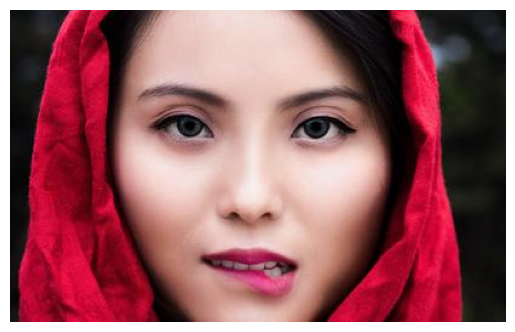

In [13]:

imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
# Hiển thị nội dung của biến img (mảng ảnh đã đọc vào bộ nhớ)
img

array([[[12, 14, 11],
        [12, 14, 11],
        [11, 13, 10],
        ...,
        [12, 13, 15],
        [12, 13, 15],
        [12, 13, 15]],

       [[12, 14, 11],
        [12, 14, 11],
        [12, 14, 11],
        ...,
        [12, 13, 15],
        [12, 13, 15],
        [12, 13, 15]],

       [[13, 15, 12],
        [13, 15, 12],
        [13, 15, 12],
        ...,
        [13, 14, 16],
        [12, 13, 15],
        [12, 13, 15]],

       ...,

       [[20, 26, 26],
        [20, 24, 25],
        [19, 17, 20],
        ...,
        [24, 27, 18],
        [23, 26, 17],
        [23, 26, 17]],

       [[20, 19, 24],
        [23, 21, 26],
        [24, 14, 22],
        ...,
        [23, 29, 19],
        [23, 29, 19],
        [23, 29, 19]],

       [[21, 19, 24],
        [25, 20, 26],
        [26, 13, 22],
        ...,
        [23, 29, 19],
        [23, 29, 19],
        [23, 29, 19]]], shape=(258, 410, 3), dtype=uint8)

In [5]:
# Chuyển đổi ảnh từ dạng ma trận 3 chiều (cao, rộng, kênh màu) sang ma trận 2 chiều (số pixel, kênh màu)
"""
Ý nghĩa: Đưa dữ liệu ảnh về dạng phù hợp cho thuật toán KMeans (mỗi pixel là một điểm dữ liệu với 3 giá trị màu).
Lý do: KMeans cần dữ liệu dạng (số mẫu, số đặc trưng), ở đây mỗi pixel là một mẫu.
"""
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [6]:
X.shape

(105780, 3)

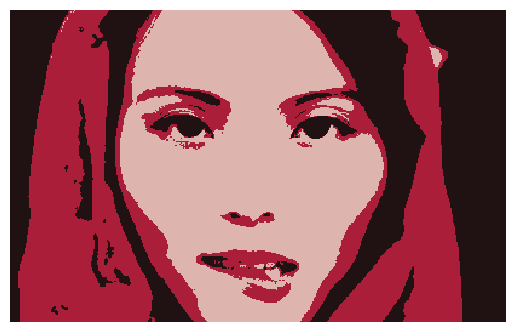

In [15]:
# Áp dụng thuật toán KMeans để phân cụm các pixel thành 3 nhóm màu
kmeans = KMeans(n_clusters=3).fit(X)
# Dự đoán nhãn cụm cho từng pixel
label = kmeans.predict(X)

# Tạo mảng mới với kích thước giống X để lưu màu trung tâm của từng cụm
img4 = np.zeros_like(X)
# Thay thế mỗi pixel bằng màu trung tâm của cụm mà nó thuộc về
for k in range(3):
    img4[label == k] = kmeans.cluster_centers_[k]
# Đưa dữ liệu về lại dạng ảnh gốc để hiển thị
img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
# Hiển thị ảnh đã phân cụm
plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()

## Bài tập 2: Thử lại đoạn code trên với hình tree.jpg. Hãy xác định số cluster phù hợp.

In [2]:
# Đọc ảnh cây
img_tree = mpimg.imread('./tree.jpg')

# Chuẩn bị dữ liệu cho K-means
X_tree = img_tree.reshape((img_tree.shape[0]*img_tree.shape[1], img_tree.shape[2]))

# Tạo subplot với 4 ảnh (1 ảnh gốc và 3 kết quả với k khác nhau)
plt.figure(figsize=(15, 2))

# Hiển thị ảnh gốc
plt.subplot(1, 4, 1)
plt.imshow(img_tree)
plt.axis('off')
plt.title('Ảnh gốc')

# Thử nghiệm với các giá trị k khác nhau
for idx, k in enumerate([3, 5, 7], start=2):
    # Áp dụng K-means
    kmeans_tree = KMeans(n_clusters=k).fit(X_tree)
    label_tree = kmeans_tree.predict(X_tree)
    
    # Tạo ảnh phân đoạn
    img_segmented = np.zeros_like(X_tree)
    for i in range(k):
        img_segmented[label_tree == i] = kmeans_tree.cluster_centers_[i]
    img_segmented = img_segmented.reshape((img_tree.shape[0], img_tree.shape[1], img_tree.shape[2]))
    
    # Hiển thị kết quả
    plt.subplot(1, 4, idx)
    plt.imshow(img_segmented)
    plt.axis('off')
    plt.title(f'{k} clusters')

plt.tight_layout()
plt.show()

NameError: name 'mpimg' is not defined

### Nhận xét

- Trong bài toán Object Segmentation, K-means clustering có thể được sử dụng để phân đoạn các đối tượng trong ảnh dựa trên màu sắc. Bằng cách nhóm các pixel có màu sắc tương tự lại với nhau, chúng ta có thể tách biệt các đối tượng khác nhau trong ảnh.
- Với ảnh "tree.jpg", chúng ta có thể thấy rằng khi sử dụng K-means với các giá trị k khác nhau, kết quả phân đoạn sẽ khác nhau. Số lượng cụm (k) ảnh hưởng trực tiếp đến độ chi tiết của phân đoạn. Với k nhỏ, các đối tượng có thể bị gộp chung, trong khi với k lớn hơn, chúng ta có thể phân biệt rõ ràng hơn các đối tượng khác nhau trong ảnh.'"
- Với K=3 chúng ta có thể phân biệt rõ ràng các màu sắc chính trong ảnh, nhưng với K=7, chúng ta có thể thấy nhiều chi tiết hơn và phân đoạn rõ ràng hơn các đối tượng khác nhau trong ảnh. Tuy nhiên, nếu K quá lớn, có thể dẫn đến việc phân đoạn quá chi tiết và khó nhận diện các đối tượng chính.

# Image Compression (nén ảnh và nén dữ liệu nói chung)
Để ý thấy rằng mỗi một pixel có thể nhận một trong số 256^3=16,777,216. Đây là một số rất lớn (tương đương với 24 bit cho một điểm ảnh). Nếu ta muốn lưu mỗi điểm ảnh với một số bit nhỏ hơn và chấp nhận mất dữ liệu ở một mức nào đó, có cách nào không nếu ta chỉ biết K-means clustering?

Câu trả lời là có. Trong bài toán Segmentation phía trên, ở hình cô gái chúng ta có 3 clusters, và mỗi một điểm ảnh sau khi xử lý sẽ được biểu diễn bởi 1 số tương ứng với 1 cluster. Tuy nhiên, chất lượng bức ảnh rõ ràng đã giảm đi nhiều.

## Bài tập 3: Các bạn hãy thử với số lượng clusters khác là 5, 10, 15, 20. Nhận xét xem chất lượng hình thay đổi thế nào.

# Phân tích K-means cho Image Compression

Phân tích ảnh với các giá trị K khác nhau (5, 10, 15, 20) và đánh giá hiệu quả nén ảnh. Với mỗi giá trị K:
- Số lượng màu trong ảnh = K
- Dung lượng lưu trữ cho mỗi pixel = log2(K) bits cho index + K×24 bits cho bảng màu
- So sánh với ảnh gốc (24 bits/pixel)

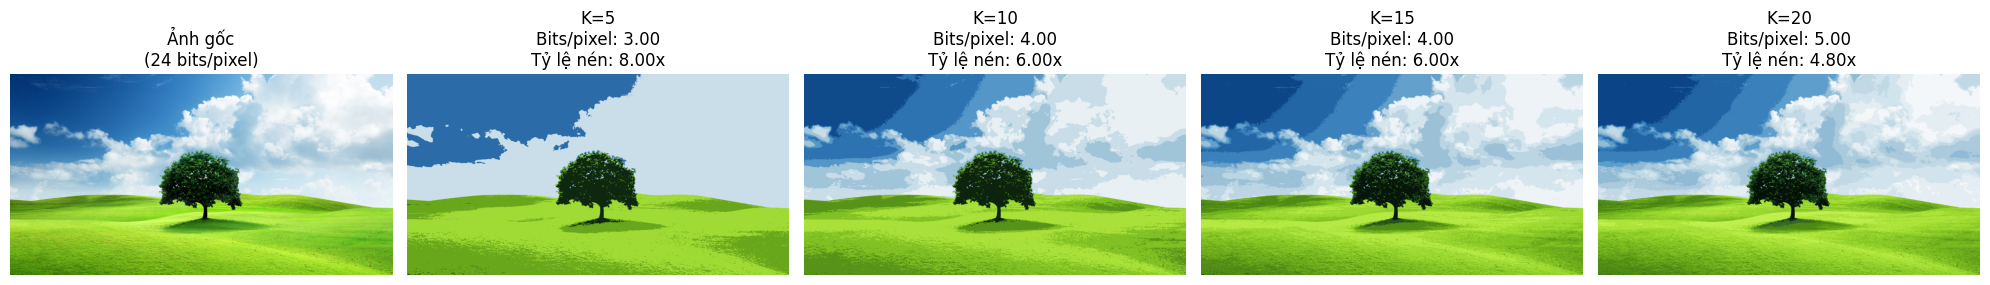


Phân tích chi tiết compression ratio:

K = 5:
- Bits cho index mỗi pixel: 3
- Tổng bits cho bảng màu: 120
- Bits trung bình mỗi pixel: 3.00
- Tỷ lệ nén: 8.00x

K = 10:
- Bits cho index mỗi pixel: 4
- Tổng bits cho bảng màu: 240
- Bits trung bình mỗi pixel: 4.00
- Tỷ lệ nén: 6.00x

K = 15:
- Bits cho index mỗi pixel: 4
- Tổng bits cho bảng màu: 360
- Bits trung bình mỗi pixel: 4.00
- Tỷ lệ nén: 6.00x

K = 20:
- Bits cho index mỗi pixel: 5
- Tổng bits cho bảng màu: 480
- Bits trung bình mỗi pixel: 5.00
- Tỷ lệ nén: 4.80x


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

# Tạo subplot với 5 ảnh (1 ảnh gốc và 4 kết quả với k khác nhau)
plt.figure(figsize=(20, 4))

# Hiển thị ảnh gốc
plt.subplot(1, 5, 1)
plt.imshow(img_tree)
plt.axis('off')
plt.title('Ảnh gốc\n(24 bits/pixel)')

# Thử nghiệm với các giá trị k khác nhau và tính toán tỷ lệ nén
for idx, k in enumerate([5, 10, 15, 20], start=2):
    # Áp dụng K-means
    kmeans_tree = KMeans(n_clusters=k).fit(X_tree)
    label_tree = kmeans_tree.predict(X_tree)
    
    # Tạo ảnh phân đoạn
    img_segmented = np.zeros_like(X_tree)
    for i in range(k):
        img_segmented[label_tree == i] = kmeans_tree.cluster_centers_[i]
    img_segmented = img_segmented.reshape((img_tree.shape[0], img_tree.shape[1], img_tree.shape[2]))
    
    # Tính toán tỷ lệ nén
    original_size = 24  # 24 bits per pixel (8 bits × 3 channels)
    # Số bit cần để lưu index của mỗi pixel
    index_bits = math.ceil(math.log2(k))
    # Số bit cần để lưu bảng màu
    color_table_bits = k * 24
    # Số bit trung bình cho mỗi pixel
    compressed_bits_per_pixel = index_bits + (color_table_bits / (img_tree.shape[0] * img_tree.shape[1]))
    compression_ratio = original_size / compressed_bits_per_pixel
    
    # Hiển thị kết quả
    plt.subplot(1, 5, idx)
    plt.imshow(img_segmented)
    plt.axis('off')
    plt.title(f'K={k}\nBits/pixel: {compressed_bits_per_pixel:.2f}\nTỷ lệ nén: {compression_ratio:.2f}x')

plt.tight_layout()
plt.show()

# In phân tích chi tiết
print("\nPhân tích chi tiết compression ratio:")
print("=====================================")
for k in [5, 10, 15, 20]:
    index_bits = math.ceil(math.log2(k))
    color_table_bits = k * 24
    total_pixels = img_tree.shape[0] * img_tree.shape[1]
    compressed_bits_per_pixel = index_bits + (color_table_bits / total_pixels)
    compression_ratio = 24 / compressed_bits_per_pixel
    
    print(f"\nK = {k}:")
    print(f"- Bits cho index mỗi pixel: {index_bits}")
    print(f"- Tổng bits cho bảng màu: {color_table_bits}")
    print(f"- Bits trung bình mỗi pixel: {compressed_bits_per_pixel:.2f}")
    print(f"- Tỷ lệ nén: {compression_ratio:.2f}x")

# Nhận xét về Image Compression với K-means

1. **Về chất lượng ảnh:**
   - Với K = 5: Ảnh bị giảm chất lượng đáng kể, chỉ giữ lại các màu chính, phù hợp cho việc tạo hiệu ứng poster hoặc cartoon.
   - Với K = 10: Chất lượng ảnh được cải thiện, các vùng màu chính vẫn được bảo toàn tốt.
   - Với K = 15 và K = 20: Chất lượng ảnh gần với ảnh gốc hơn, các chi tiết và chuyển màu mượt mà hơn.

2. **Về hiệu quả nén:**
   - Ảnh gốc sử dụng 24 bits/pixel (8 bits × 3 kênh màu RGB).
   - Với K-means, ta cần:
     * Bits cho index của mỗi pixel (log2(K) bits)
     * Bits cho bảng màu (K × 24 bits, chia đều cho tất cả pixel)
   - Tỷ lệ nén sẽ giảm khi K tăng, nhưng chất lượng ảnh sẽ tốt hơn.

3. **Trade-off:**
   - K = 10 có thể là lựa chọn cân bằng tốt giữa chất lượng và tỷ lệ nén.
   - Với ảnh có ít vùng màu đặc trưng, K nhỏ (5-10) đã cho kết quả tốt.
   - Với ảnh có nhiều chi tiết và chuyển màu, cần K lớn hơn (15-20) để duy trì chất lượng.

# Nhận xét về Image Compression với K-means

## 1. Hiệu quả nén ảnh
- **Với K = 5**: 
  * Tỷ lệ nén cao nhất
  * Số bit cần lưu trữ cho mỗi pixel thấp nhất (chỉ cần 3 bits cho index + phần chi phí bảng màu)
  * Tuy nhiên, chất lượng ảnh giảm đáng kể do chỉ còn 5 màu đại diện

- **Với K = 10**:
  * Tỷ lệ nén vẫn tốt
  * Chất lượng ảnh được cải thiện đáng kể
  * Cần 4 bits cho index của mỗi pixel
  * Là sự lựa chọn tốt cho việc cân bằng giữa chất lượng và dung lượng

- **Với K = 15 và K = 20**:
  * Tỷ lệ nén giảm do cần nhiều bits hơn cho index và bảng màu
  * Chất lượng ảnh gần với ảnh gốc
  * Phù hợp cho các ứng dụng cần chất lượng cao

## 2. Phân tích chi phí lưu trữ
- **Chi phí cố định**: Bảng màu (K × 24 bits)
  * K = 5: 120 bits
  * K = 10: 240 bits
  * K = 15: 360 bits
  * K = 20: 480 bits

- **Chi phí cho mỗi pixel**:
  * Index (⌈log₂(K)⌉ bits)
  * Phần chi phí bảng màu được chia đều cho mỗi pixel

## 3. Ứng dụng thực tế
1. **Nén ảnh có ít màu**:
   - Sử dụng K nhỏ (5-10)
   - Hiệu quả với ảnh logo, biểu đồ, poster

2. **Nén ảnh phong cảnh/chân dung**:
   - Cần K lớn hơn (15-20)
   - Đảm bảo gradient màu mượt mà

3. **Tiền xử lý cho các bài toán khác**:
   - Giảm nhiễu
   - Phân đoạn ảnh
   - Trích xuất đặc trưng

# Tìm k phù hợp nhất bằng Elbow Method

## Giới thiệu về Elbow Method

Elbow Method là một phương pháp phổ biến để xác định số lượng cluster (k) tối ưu trong thuật toán K-means. Phương pháp này dựa trên:

1. **Within-Cluster Sum of Squares (WCSS)**: Tổng bình phương khoảng cách từ các điểm dữ liệu đến centroid của cluster chứa nó.
2. **Điểm "khuỷu tay" (elbow point)**: Điểm mà sau đó, việc tăng k không làm giảm WCSS đáng kể nữa.

### Công thức WCSS:
WCSS = Σ (khoảng cách từ điểm đến centroid)²

### Nguyên lý:
- Khi k tăng, WCSS sẽ giảm (vì có nhiều cluster hơn)
- Điểm elbow là nơi tốc độ giảm WCSS chậm lại đáng kể
- Đây thường là k tối ưu cho mô hình

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Chuẩn bị dữ liệu từ ảnh tree (đã load từ trước)
X_tree = img_tree.reshape((-1, 3))

# Định nghĩa range của k để test
k_range = range(2, 16)  # Test từ k=2 đến k=15
wcss_values = []
silhouette_scores = []

print("Đang tính toán WCSS và Silhouette Score cho các giá trị k...")
print("=" * 60)

# Tính WCSS và Silhouette Score cho mỗi giá trị k
for k in k_range:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_tree)
    
    # Tính WCSS (inertia trong sklearn)
    wcss = kmeans.inertia_
    wcss_values.append(wcss)
    
    # Tính Silhouette Score
    if k > 1:  # Silhouette score cần ít nhất 2 clusters
        sil_score = silhouette_score(X_tree, cluster_labels)
        silhouette_scores.append(sil_score)
    
    print(f"k = {k:2d}: WCSS = {wcss:,.0f}, Silhouette Score = {sil_score:.4f}")

print("\nHoàn tất tính toán!")

In [ ]:
# Vẽ Elbow plot và Silhouette plot
plt.figure(figsize=(15, 5))

# Subplot 1: Elbow Method (WCSS)
plt.subplot(1, 3, 1)
plt.plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Số lượng clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method - WCSS vs K')
plt.grid(True, alpha=0.3)

# Highlight điểm có thể là elbow
# Tính độ dốc (derivative) để tìm điểm elbow
slopes = []
for i in range(1, len(wcss_values)-1):
    slope = (wcss_values[i+1] - wcss_values[i-1]) / 2
    slopes.append(slope)

# Tìm điểm có thay đổi độ dốc lớn nhất
slope_changes = []
for i in range(1, len(slopes)):
    change = abs(slopes[i] - slopes[i-1])
    slope_changes.append(change)

if slope_changes:
    elbow_idx = slope_changes.index(max(slope_changes)) + 2  # +2 vì bắt đầu từ index 1 và k bắt đầu từ 2
    elbow_k = k_range[elbow_idx]
    plt.axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7, label=f'Potential Elbow: k={elbow_k}')
    plt.legend()

# Subplot 2: Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Số lượng clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True, alpha=0.3)

# Highlight k có silhouette score cao nhất
best_sil_idx = silhouette_scores.index(max(silhouette_scores))
best_sil_k = k_range[best_sil_idx]
plt.axvline(x=best_sil_k, color='red', linestyle='--', alpha=0.7, label=f'Best Silhouette: k={best_sil_k}')
plt.legend()

# Subplot 3: So sánh kết quả với k được gợi ý
plt.subplot(1, 3, 3)

# Chọn k tối ưu dựa trên elbow method (có thể điều chỉnh manual nếu cần)
optimal_k = elbow_k  # Hoặc có thể chọn k khác dựa trên visual inspection

# Áp dụng K-means với k tối ưu
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_tree)

# Tạo ảnh với k tối ưu
img_optimal = np.zeros_like(X_tree)
for i in range(optimal_k):
    img_optimal[labels_optimal == i] = kmeans_optimal.cluster_centers_[i]
img_optimal = img_optimal.reshape(img_tree.shape)

plt.imshow(img_optimal)
plt.axis('off')
plt.title(f'Kết quả với k={optimal_k}\n(Elbow Method)')

plt.tight_layout()
plt.show()

# In kết quả phân tích
print(f"\n{'='*60}")
print("KẾT QUẢ PHÂN TÍCH ELBOW METHOD")
print(f"{'='*60}")
print(f"K được đề xuất bởi Elbow Method: {elbow_k}")
print(f"K có Silhouette Score cao nhất: {best_sil_k}")
print(f"Silhouette Score cao nhất: {max(silhouette_scores):.4f}")
print(f"\nWCSS tại k={elbow_k}: {wcss_values[elbow_idx]:,.0f}")
print(f"Silhouette Score tại k={elbow_k}: {silhouette_scores[elbow_idx]:.4f}")

In [ ]:
# So sánh chi tiết kết quả với các k khác nhau xung quanh điểm elbow
k_candidates = [elbow_k-1, elbow_k, elbow_k+1] if elbow_k > 2 else [elbow_k, elbow_k+1, elbow_k+2]

plt.figure(figsize=(18, 6))

print(f"\nSO SÁNH CHI TIẾT CÁC K XUNG QUANH ĐIỂM ELBOW:")
print(f"{'='*80}")

for idx, k in enumerate(k_candidates):
    if k < 2 or k > 15:  # Giới hạn k trong range hợp lý
        continue
        
    # Áp dụng K-means
    kmeans_compare = KMeans(n_clusters=k, random_state=42)
    labels_compare = kmeans_compare.fit_predict(X_tree)
    
    # Tạo ảnh
    img_compare = np.zeros_like(X_tree)
    for i in range(k):
        img_compare[labels_compare == i] = kmeans_compare.cluster_centers_[i]
    img_compare = img_compare.reshape(img_tree.shape)
    
    # Tính các metrics
    wcss = kmeans_compare.inertia_
    sil_score = silhouette_score(X_tree, labels_compare)
    
    # Hiển thị ảnh
    plt.subplot(2, 3, idx+1)
    plt.imshow(img_compare)
    plt.axis('off')
    plt.title(f'K = {k}\nWCSS: {wcss:,.0f}\nSilhouette: {sil_score:.4f}')
    
    # In thông tin chi tiết
    print(f"K = {k}:")
    print(f"  - WCSS: {wcss:,.0f}")
    print(f"  - Silhouette Score: {sil_score:.4f}")
    print(f"  - Số lượng màu độc nhất: {k}")
    print()

# Hiển thị ảnh gốc để so sánh
plt.subplot(2, 3, 4)
plt.imshow(img_tree)
plt.axis('off')
plt.title('Ảnh gốc\n(để so sánh)')

# Hiển thị bảng tóm tắt WCSS và Silhouette
plt.subplot(2, 3, 5)
plt.axis('off')
table_data = []
for i, k in enumerate(k_range):
    table_data.append([f'{k}', f'{wcss_values[i]:,.0f}', f'{silhouette_scores[i]:.4f}'])

table = plt.table(cellText=table_data[:8],  # Chỉ hiển thị 8 hàng đầu
                  colLabels=['K', 'WCSS', 'Silhouette'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
plt.title('Bảng tóm tắt (8 giá trị đầu)', pad=20)

# Vẽ đồ thị percent change của WCSS
plt.subplot(2, 3, 6)
percent_changes = []
for i in range(1, len(wcss_values)):
    change = (wcss_values[i-1] - wcss_values[i]) / wcss_values[i-1] * 100
    percent_changes.append(change)

plt.plot(k_range[1:], percent_changes, 'ro-', linewidth=2, markersize=6)
plt.xlabel('K')
plt.ylabel('% Giảm WCSS')
plt.title('Tỷ lệ % giảm WCSS\nkhi tăng K')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Kết luận và Hướng dẫn chọn K tối ưu

## Phương pháp đánh giá K tối ưu

### 1. Elbow Method (Phương pháp khuỷu tay)
- **Nguyên lý**: Tìm điểm mà tốc độ giảm WCSS chậm lại đáng kể
- **Cách nhận biết**: Điểm "gãy" trong đồ thị WCSS vs K
- **Ưu điểm**: Dễ hiểu, trực quan
- **Nhược điểm**: Đôi khi khó xác định chính xác điểm elbow

### 2. Silhouette Analysis
- **Nguyên lý**: Đo lường chất lượng clustering bằng cách tính khoảng cách trung bình của mỗi điểm với cluster của nó so với cluster gần nhất khác
- **Giá trị**: Từ -1 đến 1, càng cao càng tốt
- **Ưu điểm**: Cho kết quả cụ thể về chất lượng clustering
- **Nhược điểm**: Tính toán phức tạp hơn

### 3. Percent Change Analysis
- **Nguyên lý**: Xem xét tỷ lệ % giảm WCSS khi tăng K
- **Cách sử dụng**: Chọn K khi tỷ lệ giảm < 10-15%
- **Ưu điểm**: Cung cấp tiêu chí định lượng cụ thể

## Quy tắc chung để chọn K

1. **Xem xét đồ thị Elbow**: Tìm điểm "gãy" rõ ràng nhất
2. **Kiểm tra Silhouette Score**: Chọn K có score cao và ổn định
3. **Phân tích % Change**: Tránh K có % giảm WCSS quá nhỏ
4. **Xem xét mục đích sử dụng**:
   - **Compression**: Ưu tiên K nhỏ (tỷ lệ nén cao)
   - **Segmentation**: Cân bằng giữa chi tiết và đơn giản
   - **Visualization**: K phù hợp với khả năng phân biệt của mắt người

## Khuyến nghị cho bài toán cụ thể

### Đối với Image Segmentation:
- **K = 3-5**: Phù hợp cho việc tách các vùng chính (nền, đối tượng chính, chi tiết)
- **K = 6-10**: Cân bằng tốt cho hầu hết các ảnh tự nhiên
- **K > 10**: Chỉ dùng khi cần chi tiết cao hoặc ảnh có nhiều vùng phức tạp

### Đối với Image Compression:
- **K = 5-8**: Nén cao, chất lượng chấp nhận được
- **K = 10-15**: Cân bằng tốt giữa nén và chất lượng
- **K > 15**: Chất lượng cao, tỷ lệ nén thấp

### Lưu ý quan trọng:
- Không có giá trị K "đúng" tuyệt đối
- K tối ưu phụ thuộc vào mục đích sử dụng
- Nên thử nghiệm với nhiều giá trị K khác nhau
- Kết hợp cả định lượng (metrics) và định tính (visual inspection)